<a href="https://colab.research.google.com/github/BonneyBoja/BonneyBoja.github.io/blob/main/Training_on_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#importing packages
import tensorflow as tf #build and train the neural network
import numpy as np
import matplotlib.pyplot as plt # displaying the images


In [14]:
#loading dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_lables)= fashion_mnist.load_data()
#Define class  names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
#Normalize the data/images
train_images,test_images=train_images/255.0,test_images/255.0

In [16]:
#Build the model
model=tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)), # Explicitly define the input shape
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [17]:
#compile the model
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy']
               )

In [18]:
#Train the model
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7659 - loss: 0.6679
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8521 - loss: 0.4062
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8664 - loss: 0.3680
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8708 - loss: 0.3511
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8797 - loss: 0.3273
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8850 - loss: 0.3135
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8868 - loss: 0.3007
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8866 - loss: 0.3003
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8898 - loss: 0.2914
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8945 - loss: 0.2813


In [19]:
#Evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_lables)
print('\nTest accuracy', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8804 - loss: 0.3408

Test accuracy 0.8810999989509583


In [20]:
#make prediction
predictions=model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


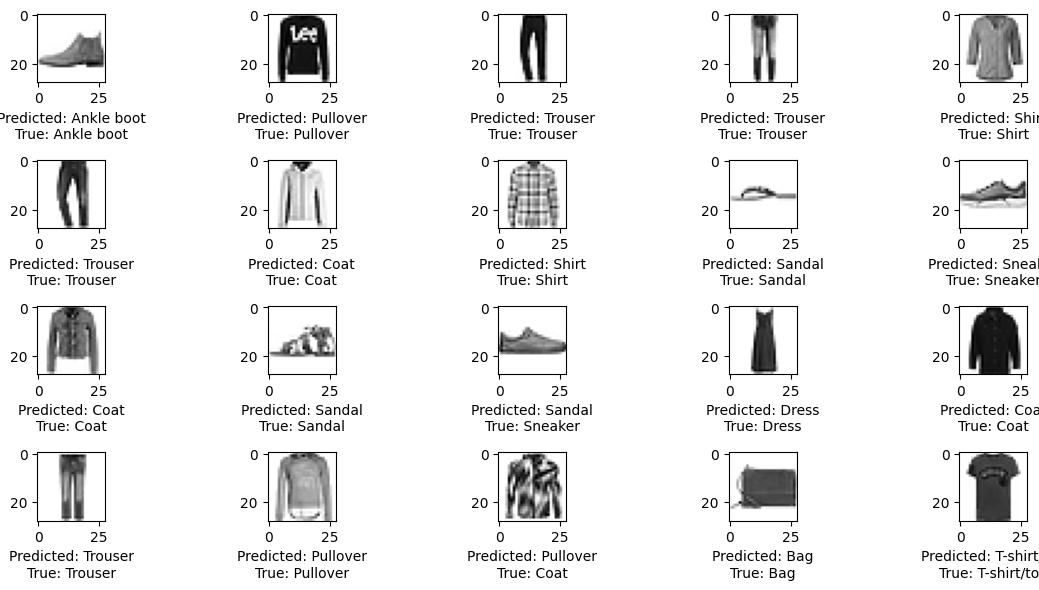

In [22]:
#Display result
plt.figure(figsize=(12,6))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  predicted_label=class_names[np.argmax(predictions[i])]
  true_label=class_names[test_lables[i]]
  plt.xlabel(f"Predicted: {predicted_label}\nTrue: {true_label}")
plt.tight_layout()
plt.show()